In [55]:
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
X, y = mglearn.datasets.make_wave(n_samples=60)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# model = LinearRegression()
# model = Ridge(alpha=1)
model = Lasso(alpha=0.01)
model.fit(X_train,y_train)

Lasso(alpha=0.01)

In [47]:
model.score(X_test, y_test)

0.6955980258586129

In [48]:
model.coef_, model.intercept_
# 계수, 절편

(array([0.43827367]), -0.017864312186584755)

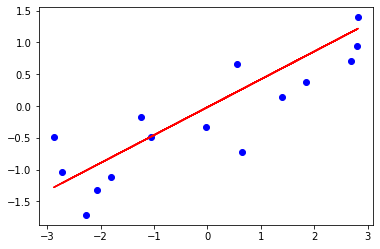

In [49]:
plt.plot(X_test, [model.coef_ * x + model.intercept_ for x in X_test], c ="r")
plt.scatter(X_test, y_test, c = "b")

In [27]:
model.predict(X_test)

array([-0.80774738,  0.79328599, -0.477252  ,  0.22521921,  1.21808786,
        0.59233369,  1.20683656, -1.21396459, -1.0119404 , -0.56453527,
       -0.92256689, -1.2787788 ,  0.2650141 , -0.03053027,  1.16279079])

In [28]:
[model.coef_ * x + model.intercept_ for x in X_test]

[array([-0.80774738]),
 array([0.79328599]),
 array([-0.477252]),
 array([0.22521921]),
 array([1.21808786]),
 array([0.59233369]),
 array([1.20683656]),
 array([-1.21396459]),
 array([-1.0119404]),
 array([-0.56453527]),
 array([-0.92256689]),
 array([-1.2787788]),
 array([0.2650141]),
 array([-0.03053027]),
 array([1.16279079])]

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [53]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [71]:
X = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
y = pd.DataFrame(cancer["target"], columns=["target"])
X.shape,y.shape

((569, 30), (569, 1))

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
model = LogisticRegression(C = 0.1, max_iter= 5000)
model.fit(X_train,y_train)


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, max_iter=5000)

In [91]:
model.score(X_test,y_test)

0.9440559440559441

In [119]:
pred = list(model.predict(X_test))
label = list(y_test["target"])
score = 0

for i,j in zip(pred,label):
    if i == j:
        score = score+1
        
# for a, i in enumerate(pred):
#     if label[a] ==i:
#         score = score+1
        
score/len(pred)

0.9440559440559441